In [1]:
import pandas as pd
customers_df = pd.read_csv( "Income Data.csv" )
customers_df.head(5)

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


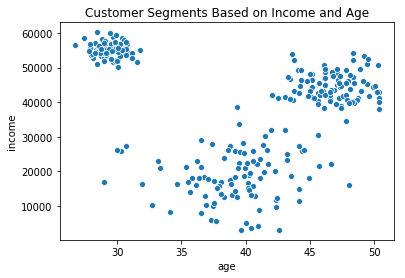

In [3]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

#sn.lmplot( "age", "income", data=customers_df, fit_reg = False, size = 4 );
plt.title( "Customer Segments Based on Income and Age");
sn.scatterplot(x="age", y="income", data=customers_df)

In [4]:
customers_df.shape

(300, 2)

In [5]:
#K-means Clustering
from sklearn.cluster import KMeans
clusters = KMeans( 3 )
clusters.fit( customers_df )


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
customers_df["clusterid"] = clusters.labels_

In [7]:
customers_df[0:5]

,income,age,clusterid
0,41100.0,48.75,0
1,54100.0,28.10,2
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1


C:\Users\GIM\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


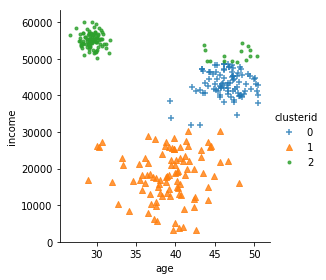

In [8]:
# Plotting the customers with their segments
markers = ['+','^','.']

sn.lmplot( "age", "income",
data=customers_df,
hue = "clusterid",
fit_reg=False,
markers = markers,
size = 4 );

In [9]:
customers_df.head()

,income,age,clusterid
0,41100.0,48.75,0
1,54100.0,28.10,2
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1


In [10]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform(customers_df[["age", "income"]] )
scaled_customers_df[0:5]
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

C:\Users\GIM\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


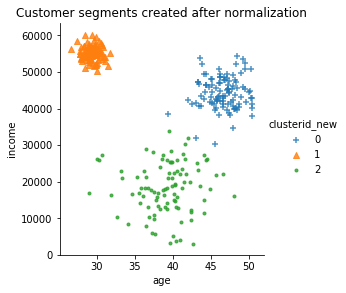

In [11]:
clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_customers_df )
customers_df["clusterid_new"] = clusters_new.labels_

markers = ['+','^','.']
sn.lmplot( "age", "income",
data=customers_df,
hue = "clusterid_new",
fit_reg=False,
markers = markers,
size = 4 );
plt.title( "Customer segments created after normalization");

In [12]:
customers_df.head()

,income,age,clusterid,clusterid_new
0,41100.0,48.75,0,0
1,54100.0,28.10,2,1
2,47800.0,46.75,0,0
3,19100.0,40.25,1,2
4,18200.0,35.80,1,2


In [13]:
clusters_new.cluster_centers_

array([[ 1.08753708,  0.29682871],
       [-1.20817959,  0.97471684],
       [ 0.09073855, -1.32005197]])

In [14]:
# Cluster Centers and Interpreting the Clusters
customers_df.groupby( 'clusterid_new' )['age','income'].agg( ["mean","std","count"] ).reset_index()

clusterid_new        age                        income                   
                      mean       std count          mean          std count
0             0  46.627184  2.151559   103  44308.737864  4390.321503   103
1             1  29.384000  0.921458   100  55204.000000  1951.943864   100
2             2  39.140206  3.558665    97  18321.649485  6924.747691    97